In [1]:
from altair import X, Y, Axis, Color, Scale
import altair as alt
import pandas as pd

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_csv('data/defect_rate.csv')

In [3]:
df

,Month,Comp_A,Comp_B
0,0,0.00,0.000
1,1,0.32,0.160
2,2,0.38,0.190
3,3,0.50,0.250
4,4,0.55,0.275
5,5,0.67,0.335
6,6,0.80,0.400
7,7,0.99,NaN
8,8,1.20,NaN
9,9,1.50,NaN


### To use Altair, data needs to be in "long format" or "tidy":

In [4]:
df_long = pd.melt(df, id_vars=['Month']).dropna()

In [5]:
df_long

,Month,variable,value
0,0,Comp_A,0.000
1,1,Comp_A,0.320
2,2,Comp_A,0.380
3,3,Comp_A,0.500
4,4,Comp_A,0.550
5,5,Comp_A,0.670
6,6,Comp_A,0.800
7,7,Comp_A,0.990
8,8,Comp_A,1.200
9,9,Comp_A,1.500


In [6]:
df_long.columns = ['MFSS', 'Component', 'Defect_Rate']

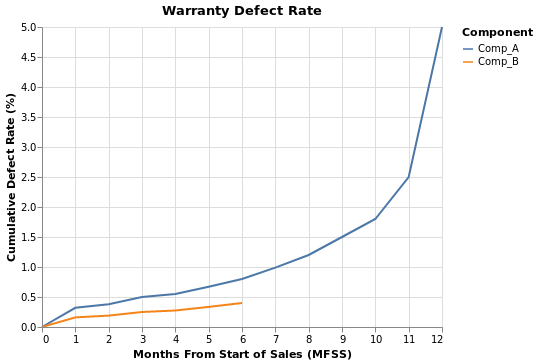

In [8]:
alt.Chart(df_long).mark_line().encode(
    x=X('MFSS:Q', axis=Axis(title='Months From Start of Sales (MFSS)')),
    y=Y('Defect_Rate:Q', axis=Axis(title='Cumulative Defect Rate (%)')),
    color='Component',
    tooltip=['Component:N', 'MFSS']
).properties(title='Warranty Defect Rate')

In [9]:
by_build_month = pd.read_clipboard(parse_dates=[0])

In [10]:
by_build_month

,Build_Month,Model_X,Model_Y
0,2017-01-01,0.80,0.70
1,2017-02-01,0.75,0.60
2,2017-03-01,0.70,0.55
3,2017-04-01,0.62,0.43
4,2017-05-01,0.40,0.30
5,2017-06-01,0.30,0.20
6,2017-07-01,0.22,NaN


In [11]:
by_build_month['YR_MTH'] = by_build_month['Build_Month'].apply(lambda x: x.strftime('%Y-%m'))
by_build_month

,Build_Month,Model_X,Model_Y,YR_MTH
0,2017-01-01,0.80,0.70,2017-01
1,2017-02-01,0.75,0.60,2017-02
2,2017-03-01,0.70,0.55,2017-03
3,2017-04-01,0.62,0.43,2017-04
4,2017-05-01,0.40,0.30,2017-05
5,2017-06-01,0.30,0.20,2017-06
6,2017-07-01,0.22,NaN,2017-07


In [12]:
by_build_month_long = pd.melt(by_build_month, id_vars=['YR_MTH'], value_vars=['Model_X','Model_Y'], value_name='Defect_Rate', var_name='Model').dropna()

In [13]:
by_build_month_long

,YR_MTH,Model,Defect_Rate
0,2017-01,Model_X,0.80
1,2017-02,Model_X,0.75
2,2017-03,Model_X,0.70
3,2017-04,Model_X,0.62
4,2017-05,Model_X,0.40
5,2017-06,Model_X,0.30
6,2017-07,Model_X,0.22
7,2017-01,Model_Y,0.70
8,2017-02,Model_Y,0.60
9,2017-03,Model_Y,0.55


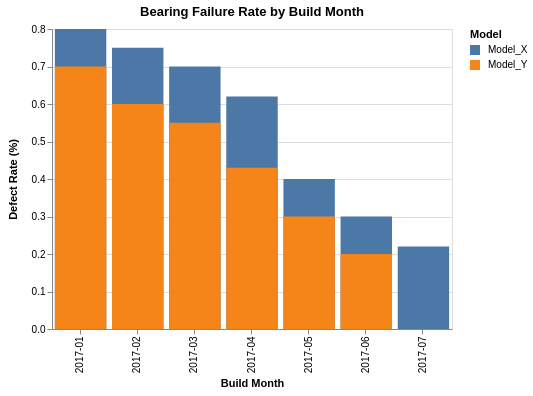

In [14]:
alt.Chart(by_build_month_long).mark_bar().encode(
    x=X('YR_MTH', axis=Axis(title='Build Month')),
    y=Y('Defect_Rate:Q', axis=Axis(title='Defect Rate (%)'), stack=None),
    color=Color('Model:N'),
    tooltip=['Model', 'YR_MTH', 'Defect_Rate'],
).properties(title='Bearing Failure Rate by Build Month', width=400)